In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

# Add asset from file system
df_salary = pd.read_csv('../datasets/SalaryData.csv')
df_salary.shape
df_salary.isnull().values.any()
training_set, test_set = train_test_split(df_salary, test_size=0.2, random_state=51)


In [10]:
training_set_copy = training_set.copy()
training_set_copy.describe()

,YearsExperience,Salary
count,24.000000,24.000000
mean,5.208333,74482.958333
std,2.731764,26199.559747
min,1.100000,39343.000000
25%,3.525000,56878.250000
50%,4.700000,64623.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [11]:
training_set_copy.corr()

,YearsExperience,Salary
YearsExperience,1.0000,0.9768
Salary,0.9768,1.0000


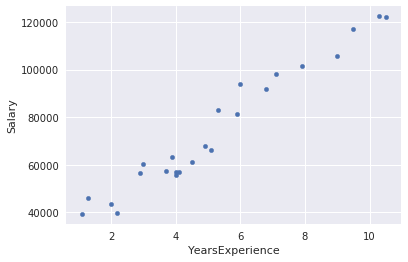

In [12]:
training_set_copy.plot.scatter(x='YearsExperience',y='Salary')

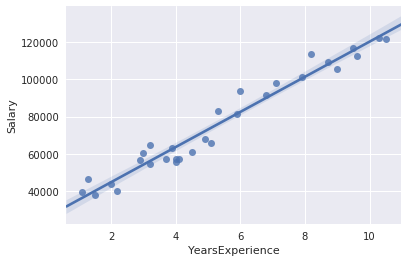

In [13]:
sns.regplot('YearsExperience', \
            'Salary', \
            data=df_salary)

In [14]:
#training_data=training_set.drop(axis=1,columns=['Salary'])
training_data=training_set.drop('Salary', axis=1)
training_label=training_set['Salary']
lreg_model=LinearRegression()
lreg_model.fit(training_data,training_label)
print('Coeffiency: ', lreg_model.coef_)
print('Intercept: ', lreg_model.intercept_)

('Coeffiency: ', array([9368.202179]))
('Intercept: ', 25690.238651039508)


In [15]:
test_data = test_set.drop('Salary',axis=1)
salary_pred = lreg_model.predict(test_data)
print salary_pred

lreg_model.score(test_data, test_set['Salary'])

[107193.59760834  55668.48562384  39742.54191954 102509.49651884
  55668.48562384 115624.97956944]


0.9608624689052039

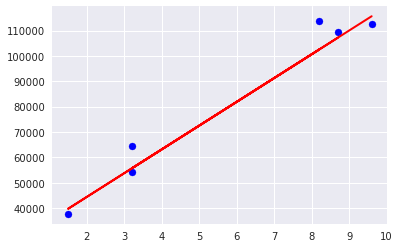

In [16]:
plt.scatter(test_set["YearsExperience"], test_set["Salary"],  color='blue')
plt.plot(test_set["YearsExperience"], salary_pred, color='red', linewidth=2)

## Save Model

In [20]:
from dsx_ml.ml import save

%env CURL_CA_BUNDLE=''
%env REQUESTS_CA_BUNDLE=''

save(name='salary_linear_reg',
     model=lreg_model,
     x_test=pd.DataFrame(test_data),
     y_test=pd.DataFrame(salary_pred),
     algorithm_type='Regression')

env: CURL_CA_BUNDLE=''
env: REQUESTS_CA_BUNDLE=''


{'path': '/user-home/1026/DSX_Projects/machine-learning-model-api-flask/models/salary_linear_reg/3',
 'scoring_endpoint': 'https://dsxl-api/v3/project/score/Python27/scikit-learn-0.19/machine-learning-model-api-flask/salary_linear_reg/3'}

In [17]:
# Pickle the linear regression model

# Save Model
# import pickle
# import inspect

# with open('python_lreg_model.pkl', 'wb') as file_handler:
#     pickle.dump(lreg_model, file_handler);
    
# def score(data):    
#     try:
#         data['yearsExperience']
#     except:
#         return {
#             'score':-1,
#             'error':'invalid data format: {0}'.format(data)
#         }
    
#     with open('python_lreg_model.pkl', "rb") as file_handler:
#         loaded_lr_model = pickle.load(file_handler)
#         score_predict=loaded_lr_model.predict([   
#             [data['yearsExperience']]   
#         ])
#         print score_predict
#         return {'score': score_predict[0]}
    
#     return {'score':-1, 'error':'cannot load model'};

# import json
# score_result=score({'yearsExperience':12})
# json.dumps(score_result)

[138108.66479904]


'{"score": 138108.6647990445}'